In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('AmesHousing.csv')

In [3]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
df.drop(['Order', 'PID'], axis=1, inplace=True)

<AxesSubplot:xlabel='SalePrice'>

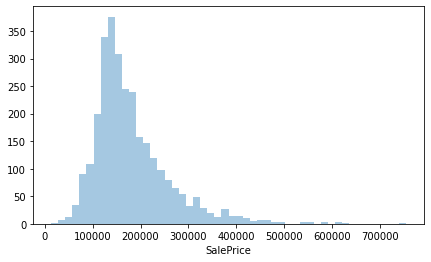

In [8]:
fig, ax = plt.subplots(figsize=(7,4))
sns.distplot(df['SalePrice'], kde=False, ax=ax)

In [10]:
print(df['SalePrice'].describe().apply(lambda x: '{:,.1f}'.format(x)))

count      2,930.0
mean     180,796.1
std       79,886.7
min       12,789.0
25%      129,500.0
50%      160,000.0
75%      213,500.0
max      755,000.0
Name: SalePrice, dtype: object


In [17]:
missing_values = pd.DataFrame({
    'Column': df.columns.values,
    '# of missing values': df.isna().sum().values,
    '% of missing values': 100 * df.isna().sum().values / len(df),
})

missing_values = missing_values[missing_values['# of missing values'] > 0]
print(missing_values.sort_values(by='# of missing values', 
                                 ascending=False
                                ).reset_index(drop=True))

            Column  # of missing values  % of missing values
0          Pool QC                 2917            99.556314
1     Misc Feature                 2824            96.382253
2            Alley                 2732            93.242321
3            Fence                 2358            80.477816
4     Fireplace Qu                 1422            48.532423
5     Lot Frontage                  490            16.723549
6      Garage Cond                  159             5.426621
7      Garage Qual                  159             5.426621
8    Garage Finish                  159             5.426621
9    Garage Yr Blt                  159             5.426621
10     Garage Type                  157             5.358362
11   Bsmt Exposure                   83             2.832765
12  BsmtFin Type 2                   81             2.764505
13  BsmtFin Type 1                   80             2.730375
14       Bsmt Qual                   80             2.730375
15       Bsmt Cond      

In [18]:
df.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'], 
        axis=1, inplace=True)

In [19]:
cols_with_missing_values = df.columns[df.isna().sum() > 0]
for col in cols_with_missing_values:
    print(col)
    print(df[col].unique()[:5])
    print('*'*30)

Lot Frontage
[141.  80.  81.  93.  74.]
******************************
Mas Vnr Type
['Stone' 'None' 'BrkFace' nan 'BrkCmn']
******************************
Mas Vnr Area
[112.   0. 108.  20. 603.]
******************************
Bsmt Qual
['TA' 'Gd' 'Ex' nan 'Fa']
******************************
Bsmt Cond
['Gd' 'TA' nan 'Po' 'Fa']
******************************
Bsmt Exposure
['Gd' 'No' 'Mn' 'Av' nan]
******************************
BsmtFin Type 1
['BLQ' 'Rec' 'ALQ' 'GLQ' 'Unf']
******************************
BsmtFin SF 1
[ 639.  468.  923. 1065.  791.]
******************************
BsmtFin Type 2
['Unf' 'LwQ' 'BLQ' 'Rec' nan]
******************************
BsmtFin SF 2
[   0.  144. 1120.  163.  168.]
******************************
Bsmt Unf SF
[ 441.  270.  406. 1045.  137.]
******************************
Total Bsmt SF
[1080.  882. 1329. 2110.  928.]
******************************
Electrical
['SBrkr' 'FuseA' 'FuseF' 'FuseP' nan]
******************************
Bsmt Full Bath
[ 1.  0.  2.  3.

In [20]:
num_with_missing = ['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 
                    'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 
                    'Garage Yr Blt', 'Garage Cars', 'Garage Area']

for n_col in num_with_missing:
    df[n_col] = df[n_col].fillna(df[n_col].mean())

In [21]:
cat_with_missing = [x for x in cols_with_missing_values if x not in num_with_missing]

for c_col in cat_with_missing:
    df[c_col] = df[c_col].fillna(df[c_col].mode().to_numpy()[0])

In [22]:
data_types = pd.DataFrame({
    'Column': df.select_dtypes(exclude='object').columns.values,
    'Data type': df.select_dtypes(exclude='object').dtypes.values
})

print(data_types)

             Column Data type
0       MS SubClass     int64
1      Lot Frontage   float64
2          Lot Area     int64
3      Overall Qual     int64
4      Overall Cond     int64
5        Year Built     int64
6    Year Remod/Add     int64
7      Mas Vnr Area   float64
8      BsmtFin SF 1   float64
9      BsmtFin SF 2   float64
10      Bsmt Unf SF   float64
11    Total Bsmt SF   float64
12       1st Flr SF     int64
13       2nd Flr SF     int64
14  Low Qual Fin SF     int64
15      Gr Liv Area     int64
16   Bsmt Full Bath   float64
17   Bsmt Half Bath   float64
18        Full Bath     int64
19        Half Bath     int64
20    Bedroom AbvGr     int64
21    Kitchen AbvGr     int64
22    TotRms AbvGrd     int64
23       Fireplaces     int64
24    Garage Yr Blt   float64
25      Garage Cars   float64
26      Garage Area   float64
27     Wood Deck SF     int64
28    Open Porch SF     int64
29   Enclosed Porch     int64
30       3Ssn Porch     int64
31     Screen Porch     int64
32        

In [23]:
df['MS SubClass'].unique().tolist()

[20, 60, 120, 50, 85, 160, 80, 30, 90, 190, 45, 70, 75, 40, 180, 150]

In [24]:
df['MS SubClass'] = df['MS SubClass'].astype(str)

In [25]:
selected_vars = ['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
                 'Neighborhood', 'Overall Qual', 'Overall Cond',
                 'Year Built', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
                 'Gr Liv Area', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 
                 'Kitchen AbvGr', 'TotRms AbvGrd', 'Garage Area', 
                 'Pool Area', 'SalePrice']

df = df[selected_vars]

In [26]:
df = pd.get_dummies(df)

In [27]:
train_df = df.sample(frac=0.8, random_state=9)
test_df = df.drop(train_df.index)

In [28]:
train_labels = train_df.pop('SalePrice')
test_labels = test_df.pop('SalePrice')

In [29]:
predictor_vars = train_df.columns

for col in predictor_vars:
    # Calculating variable mean and std from training data
    col_mean = train_df[col].mean()
    col_std = train_df[col].std()
    if col_std == 0:
        col_std = 1e-20
    train_df[col] = (train_df[col] - col_mean) / col_std
    test_df[col] = (test_df[col] - col_mean) / col_std    

In [30]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [31]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[train_df.shape[1]]),
    layers.Dropout(0.3, seed=2),
    layers.Dense(64, activation='swish'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='swish'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='swish'),
    layers.Dense(1)
])

In [32]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=optimizer,
              metrics=['mae'])

In [33]:
history = model.fit(
    train_df, train_labels,
    epochs=70, validation_split=0.2
)

Epoch 1/70
59/59 [==============================] - 5s 16ms/step - loss: 36767744000.0000 - mae: 175665.0938 - val_loss: 27989372928.0000 - val_mae: 151432.7969
Epoch 2/70
59/59 [==============================] - 1s 9ms/step - loss: 8508916224.0000 - mae: 69967.2188 - val_loss: 1483795456.0000 - val_mae: 26079.1250
Epoch 3/70
59/59 [==============================] - 0s 8ms/step - loss: 2278685696.0000 - mae: 31251.8340 - val_loss: 1168571392.0000 - val_mae: 21094.4980
Epoch 4/70
59/59 [==============================] - 0s 8ms/step - loss: 1952770048.0000 - mae: 29866.5977 - val_loss: 1087195008.0000 - val_mae: 20312.4043
Epoch 5/70
59/59 [==============================] - 1s 10ms/step - loss: 1929357568.0000 - mae: 28029.6855 - val_loss: 1222956160.0000 - val_mae: 21115.7266
Epoch 6/70
59/59 [==============================] - 1s 9ms/step - loss: 1682296064.0000 - mae: 27044.4707 - val_loss: 1041932736.0000 - val_mae: 20050.7402
Epoch 7/70
59/59 [==============================] - 1s 9ms

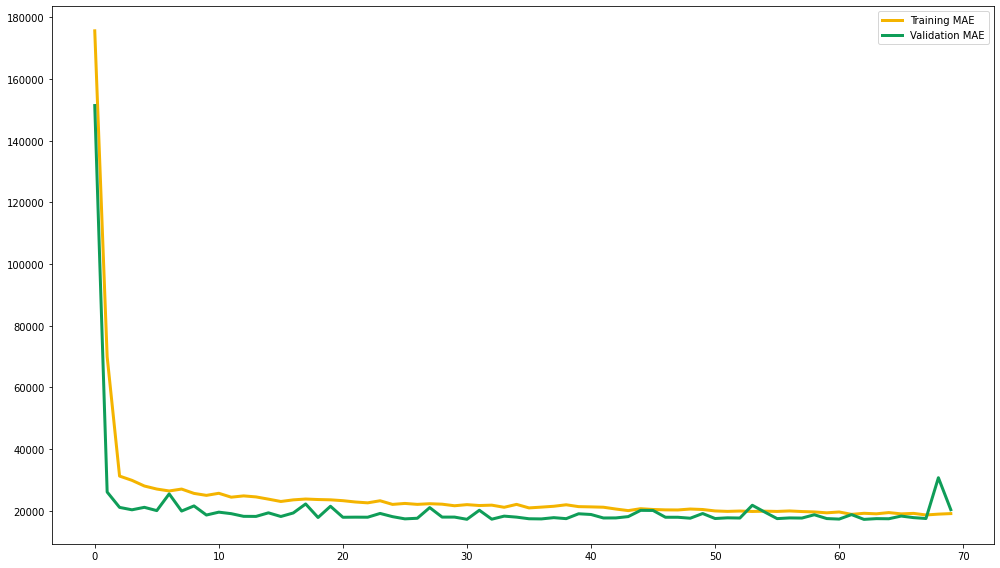

In [34]:
model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(figsize=(14,8))
num_epochs = model_history.shape[0]
ax.plot(np.arange(0, num_epochs), model_history["mae"], 
        label="Training MAE", lw=3, color='#f4b400')
ax.plot(np.arange(0, num_epochs), model_history["val_mae"], 
        label="Validation MAE", lw=3, color='#0f9d58')
ax.legend()
plt.tight_layout()
plt.show()

In [35]:
test_unit = test_df.iloc[[0]]

In [36]:
test_pred = model.predict(test_unit).squeeze()

In [37]:
test_lbl = test_labels.iloc[0]

In [38]:
print("Model prediction = {:.2f}".format(test_pred))
print("Actual value = {:.2f}".format(test_lbl))

Model prediction = 194565.78
Actual value = 215000.00


In [39]:
test_unit = test_df.iloc[[100]]

In [40]:
test_pred = model.predict(test_unit).squeeze()
test_lbl = test_labels.iloc[100]
print("Model prediction = {:.2f}".format(test_pred))
print("Actual value = {:.2f}".format(test_lbl))

Model prediction = 319880.88
Actual value = 370878.00


In [41]:
loss, mae = model.evaluate(test_df, test_labels, verbose=0)

In [42]:
print('MAE = {:.2f}'.format(mae))

MAE = 1951471924509488971776.00


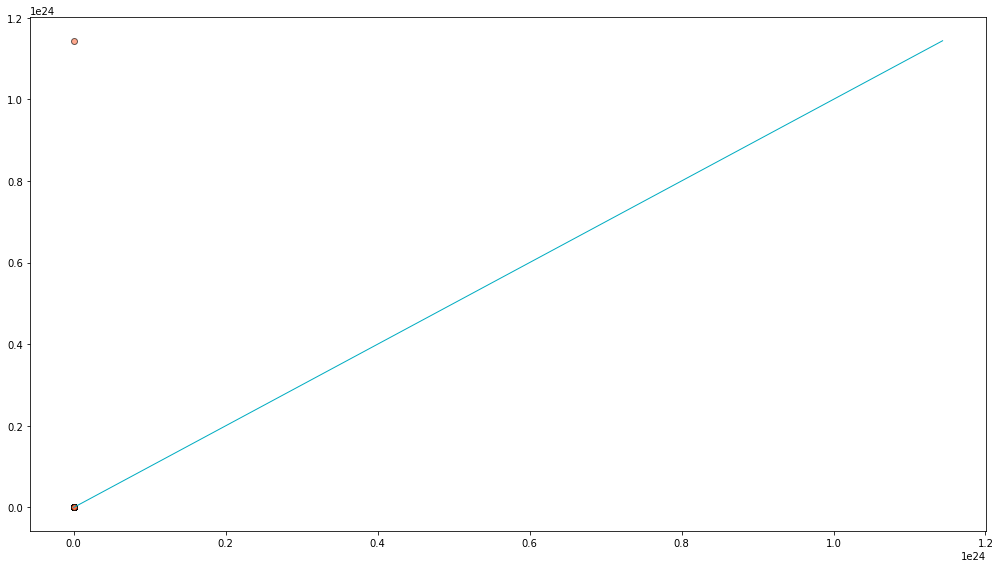

In [43]:
test_predictions_ = model.predict(test_df).flatten()
test_labels_ = test_labels.to_numpy().flatten()
fig, ax = plt.subplots(figsize=(14,8))
plt.scatter(test_labels_, test_predictions_, alpha=0.6, 
            color='#ff7043', lw=1, ec='black')
lims = [0, max(test_predictions_.max(), test_labels_.max())]
plt.plot(lims, lims, lw=1, color='#00acc1')
plt.tight_layout()
plt.show()